In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as ana
import matplotlib.pyplot as plt
%matplotlib inline

#### This is a Amazon alexa's reviews data set
- rating : rating of the products from 1-5.
- data : This column shows on what date users voted.
- variation : This column shows which product has been commented on.
- verified_reviews : Users reviews.
- feedback : This column shows whether users review is positive or negative.

In [2]:
#dataset
df=pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# Exploratory data analysis

In [4]:
# How many unique products are there.
df['variation'].nunique()

16

In [5]:
# How many comments have been made on individual products
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:>

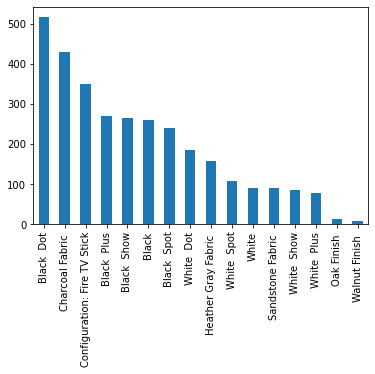

In [6]:
df['variation'].value_counts().plot.bar()

- Black Dot, Charcoal Fabric, Configuration: Fire TV Stick haven been commented more than 300 times.

In [7]:
# Which alexa product has highest vote
highestVote=df.groupby('variation').agg({'rating':'mean'}).sort_values('rating',ascending=False)
highestVote

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429
Black Show,4.490566
Black Dot,4.453488
White Dot,4.423913
Black Plus,4.370370


------------------------------------------------------------------------------------------------------------------------------
## Important Inference 
- On comment section "Walnut Finish" has been commented only 9 times. But in Rating section "Walnut Finish" has highest rating among all products.
------------------------------------------------------------------------------------------------------------------------------

In [8]:
# How many positive and negative reviwes 
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot:>

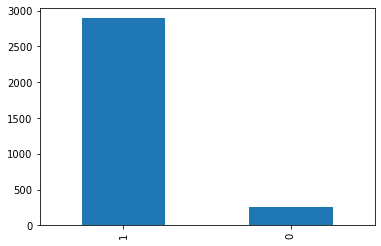

In [9]:
df['feedback'].value_counts().plot.bar()

In [10]:
# Which rating value is highly used
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

<AxesSubplot:>

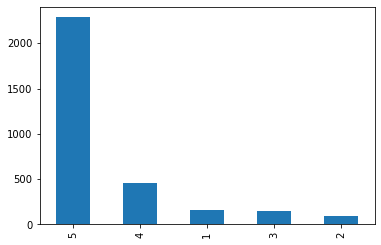

In [11]:
df['rating'].value_counts().plot.bar()

<IPython.core.display.Javascript object>

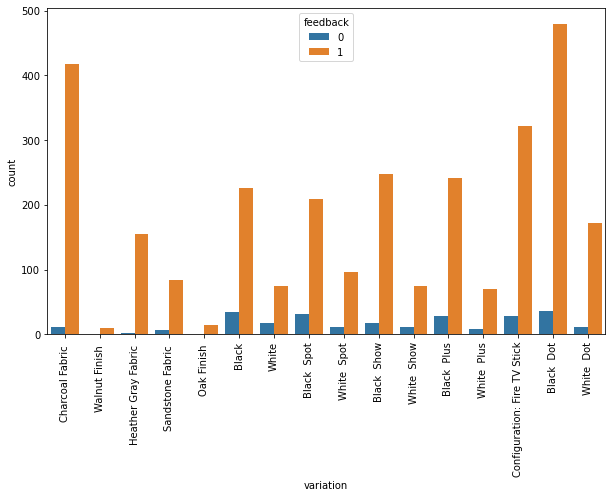

In [12]:
# How many positive reviews and negative reviews have been written on each product
plt.figure(figsize=(10,6))
sns.countplot(x=df['variation'],hue=df['feedback']) 
plt.xticks(rotation=90)
plt.show()

- "Walnut Finish" has no negative comments

In [13]:
# Positive reviwes on individual products
df[df['feedback']==1]['variation'].value_counts()

Black  Dot                      480
Charcoal Fabric                 418
Configuration: Fire TV Stick    322
Black  Show                     247
Black  Plus                     242
Black                           226
Black  Spot                     209
White  Dot                      172
Heather Gray Fabric             155
White  Spot                      97
Sandstone Fabric                 84
White                            74
White  Show                      74
White  Plus                      70
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [14]:
# Negative reviews on individual products
df[df['feedback']==0]['variation'].value_counts()

Black  Dot                      36
Black                           35
Black  Spot                     32
Black  Plus                     28
Configuration: Fire TV Stick    28
Black  Show                     18
White                           17
White  Spot                     12
White  Dot                      12
Charcoal Fabric                 12
White  Show                     11
White  Plus                      8
Sandstone Fabric                 6
Heather Gray Fabric              2
Name: variation, dtype: int64

# Sentiment Analysis

In [15]:
reviews=df[['verified_reviews']]

In [16]:
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [17]:
def PosTagFun(feature):
    if feature.startswith('J'):
        return wordnet.ADJ
    elif feature.startswith('V'):
        return wordnet.VERB
    elif feature.startswith('N'):
        return wordnet.NOUN
    elif feature.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [18]:
def CleanFun(text):
    text=text.lower() # lowercase
    text=[text.translate(str.maketrans(' ',' ',string.punctuation)) for text in text.split(" ")] # tokenizing & removing punctuation
    text=[word for word in text if len(word)>0] # removing words which has length less than 0
    stop=stopwords.words('english')         # stop words
    text=[word for word in text if word not in stop] # removing stop words
    text=[word for word in text if not any(c.isdigit() for c in word)]  # removing numbers
    tags=pos_tag(text)  # adding tags (parts of speech)
    text=[WordNetLemmatizer().lemmatize(word[0],PosTagFun(word[1])) for word in tags] # lemmatizing words
    text=[words for words in text if len(words)>1]
    text=" ".join(text)
    return text

In [19]:
import warnings
warnings.filterwarnings('ignore')
reviews['cleaned_reviews']=reviews['verified_reviews'].apply(lambda a : CleanFun(a))

In [20]:
reviews.head()

,verified_reviews,cleaned_reviews
0,Love my Echo!,love echo
1,Loved it!,love
2,"Sometimes while playing a game, you can answer...",sometimes play game answer question correctly ...
3,I have had a lot of fun with this thing. My 4 ...,lot fun thing yr old learn dinosaur control li...
4,Music,music


In [21]:
from wordcloud import WordCloud
def wordCloud(var):
    cloud=WordCloud(width=800,height=800,background_color='black',min_font_size=10).generate(" ".join(var.values))
    plt.figure(figsize=(8,8))
    plt.imshow(cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Most used words on Alexa products',fontsize=30)
    plt.show()

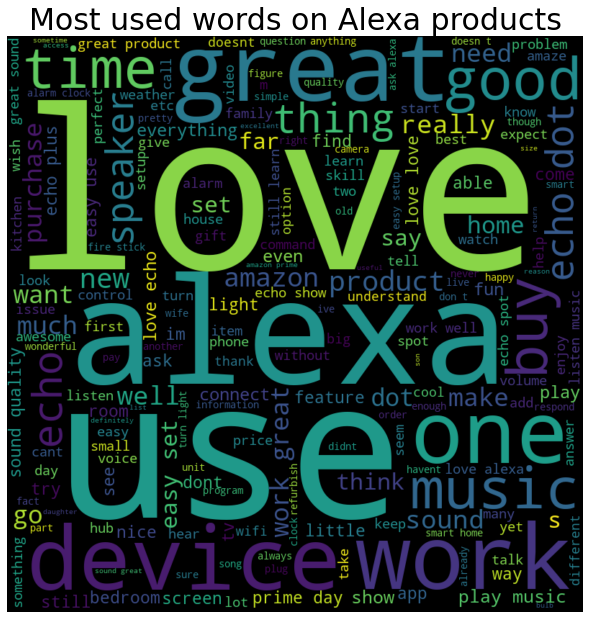

In [22]:
wordCloud(reviews['cleaned_reviews'])

------------------------------------------------------------------------
### we can saw more "Positive Comments" on Amazon alexa from the word cloud
------------------------------------------------------------------------

# Feature Engineering

In [23]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [24]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [25]:
reviews=reviews.drop(['verified_reviews'],axis=1)

In [27]:
final_df=df.copy()
final_df=pd.concat([final_df,reviews],axis=1)
final_df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes play game answer question correctly ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [28]:
final_df=final_df.drop(['verified_reviews','rating','date'],axis=1)
final_df.head()

,variation,feedback,cleaned_reviews
0,Charcoal Fabric,1,love echo
1,Charcoal Fabric,1,love
2,Walnut Finish,1,sometimes play game answer question correctly ...
3,Charcoal Fabric,1,lot fun thing yr old learn dinosaur control li...
4,Charcoal Fabric,1,music


In [29]:
# Encoding 
variation_encoding=pd.get_dummies(final_df['variation'],drop_first=True)
variation_encoding.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
final_df=final_df.drop(['variation'],axis=1)
final_df=pd.concat([final_df,variation_encoding],axis=1)
final_df.shape

(3150, 17)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
review_encode=pd.DataFrame(vector.fit_transform(final_df['cleaned_reviews']).toarray())
review_encode.head()

,0,1,2,3,4,5,6,7,8,9,...,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.213552,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.335857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_df=final_df.drop(['cleaned_reviews'],axis=1)

In [35]:
final_df=pd.concat([final_df,review_encode],axis=1)
final_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535
0,1,0,0,0,0,1,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,1,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,1,0,0,0,0,...,0.0,0.335857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,1,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [36]:
X=final_df.drop(['feedback'],axis=1)
y=final_df['feedback']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
print("X_train Size :",X_train.shape)
print("X_test Size :",X_test.shape)
print("y_train Size :",y_train.shape)
print("y_test Size :",y_test.shape)

X_train Size : (2205, 3551)
X_test Size : (945, 3551)
y_train Size : (2205,)
y_test Size : (945,)


## Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_classi=RandomForestClassifier()
rf_model=rf_classi.fit(X_train,y_train)

In [43]:
rf_pred=rf_classi.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
print("Accuracy : {}".format(accuracy_score(y_test,rf_pred)))
print("Cofusion Matrix :")
print(confusion_matrix(y_test,rf_pred))
print("Classification Report :")
print(classification_report(y_test,rf_pred))

Accuracy : 0.9301587301587302
Cofusion Matrix :
[[ 30  58]
 [  8 849]]
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.34      0.48        88
           1       0.94      0.99      0.96       857

    accuracy                           0.93       945
   macro avg       0.86      0.67      0.72       945
weighted avg       0.92      0.93      0.92       945



## Hyper parameter tuning on Random Forest Classification

In [55]:
params= {'criterion':['gini','entropy'],
         'n_estimators':[int(a) for a in np.linspace(10,1500,14)],
        'max_depth':[int(x) for x in np.linspace(10,1000,10)],
        'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[1,3,5,7,9,11],
        'min_samples_split':[5,10,15,20,25]}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
rf_classifier=RandomForestClassifier()
rcv_classifier=RandomizedSearchCV(rf_classifier,param_distributions=params,cv=10,n_iter=100,n_jobs=-1,verbose=2,random_state=42)
rcv_classifier.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 103.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [57]:
print("The Best Parameters : {}".format(rcv_classifier.best_params_))

The Best Parameters : {'n_estimators': 1041, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'gini'}


In [62]:
rcv_pred=rcv_classifier.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test,rcv_pred)))
print("Confusion Matrix :")
print(confusion_matrix(y_test,rcv_pred))
print("Classification Report :")
print(classification_report(y_test,rcv_pred))

Accuracy score : 0.9291005291005291
Confusion Matrix :
[[ 21  67]
 [  0 857]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        88
           1       0.93      1.00      0.96       857

    accuracy                           0.93       945
   macro avg       0.96      0.62      0.67       945
weighted avg       0.93      0.93      0.91       945



-----------------------------------------------
####                                 Accuracy is approximately 92%
-----------------------------------------------